# NGC 4858

NGC 4858 is located in the Coma cluster, close to the elliptical NGC 4860. This galaxy exhibits a peculiar morphology, characterized by its disrupted appearance and signs of active star formation. With a moderately high star-formation rate, NGC 4858 showcases numerous bright HII regions embedded within a distorted disk, likely influenced by its interaction with the surrounding intracluster medium (ICM). The tidal features and extended ionized gas tails suggest that NGC 4858 is undergoing ram-pressure stripping, a process that can trigger star formation while simultaneously removing gas from the galaxy.

<img src="images/NGC4858.png" width="500"/>

In [2]:
from astropy.io import fits
import numpy as np

# Open the FITS file and load data
with fits.open("DATA/NGC4858.fits") as hdul:
    hdul.info()  # Shows a summary of the FITS file

    print('\n')
    header_0 = hdul[0].header
    for card in header_0.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")  
    
    print('\n')
    header_1 = hdul[1].header
    for card in header_1.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")

    print('\n')
    header_2 = hdul[2].header
    for card in header_2.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")
        
    # Load data
    cube = hdul[1].data 
    var = hdul[2].data 

# Generate the wavelength array
channels = np.arange(0, header_1['NAXIS3'], 1)
w = header_1['CRVAL3'] + channels * header_1['CD3_3']   # wavelength in angstrom

cube_units = 1e-20
var_units = 1e-40

naxis1, naxis2 = header_1['NAXIS1'], header_1['NAXIS2']
crpix1, crpix2 = header_1['CRPIX1'], header_1['CRPIX2']
crval1, crval2 = header_1['CRVAL1'], header_1['CRVAL2']
cdelt1, cdelt2 = header_1['CD1_1'], header_1['CD2_2']

# RA range
ra_min = crval1 + (1 - crpix1) * cdelt1
ra_max = crval1 + (naxis1 - crpix1) * cdelt1

# DEC range
dec_min = crval2 + (1 - crpix2) * cdelt2
dec_max = crval2 + (naxis2 - crpix2) * cdelt2

Filename: DATA/NGC4858.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1509   ()      
  1  DATA          1 ImageHDU        51   (432, 433, 3681)   float32   
  2  STAT          1 ImageHDU        43   (432, 433, 3681)   float32   


SIMPLE   = True / file does conform to FITS standard
BITPIX   = 8 / number of bits per data pixel
NAXIS    = 0 / number of data axes
EXTEND   = True / FITS dataset may contain extensions
COMMENT  =   FITS (Flexible Image Transport System) format is defined in 'Astronomy / 
COMMENT  =   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H / 
DATE     = 2024-02-16T16:22:02 / file creation date (YYYY-MM-DDThh:mm:ss UT)
ORIGIN   = ESO-PARANAL / European Southern Observatory
TELESCOP = ESO-VLT-U4 / ESO <TEL>
INSTRUME = MUSE / Instrument used.
RA       = 194.756621 / [deg] 12:59:01.5 RA (J2000) pointing
DEC      = 28.12035 / [deg] 28:07:13.2 DEC (J2000) pointing
EQUINOX  = 2000.0 / Standard FK

In [3]:

# Sum of spectra along spatial axes, resulting in a 1D spectrum
summed_spectra = np.nansum(cube, axis=(1, 2))


In [4]:
summed_var = np.nansum(var, axis=(1,2))

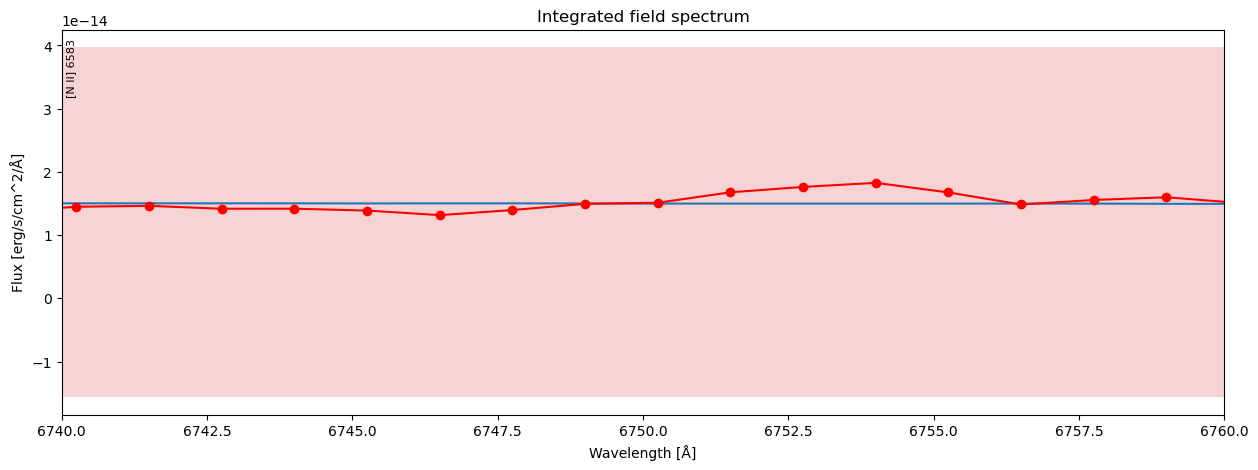

In [5]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,5))
plt.title("Integrated field spectrum")

plt.errorbar(w, summed_spectra*cube_units, yerr=np.sqrt(summed_var*var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5,linestyle='-')

from scipy.ndimage import median_filter
continuum = median_filter(summed_spectra, size=101,mode="nearest")  # Choose an odd kernel size
plt.plot(w,continuum*cube_units)

plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [erg/s/cm^2/Å]")

# Define UBVRI filter wavelength ranges (in Angstrom)
filters = {
    "U": (3200, 4000),
    "B": (4000, 5000),
    "V": (5000, 6000),
    "R": (6000, 7000),
    "I": (7000, 9000),
}

min = np.min(summed_spectra*cube_units)
max = np.max(summed_spectra*cube_units)
# Add vertical shaded regions corresponding to the filters
for name, (wmin, wmax) in filters.items():
    plt.fill_betweenx([min, max], wmin, wmax, alpha=0.2, label=f"{name} filter")
    
z_Coma = 0.0231

# Define important emission/absorption lines in galaxies
# Define important emission/absorption lines in galaxies
spectral_lines = {
    # Optical Lines
    "O II (Doublet)": 3727,
    "Hγ": 4340,
    "Hδ": 4102,
    "Hβ": 4861,
    "[O III] 4959": 4959,
    "[O III] 5007": 5007,
    "He II 4686": 4686,
    "He I 4471": 4471,
    "He I 5876": 5876,
    "Hα": 6563,
    "[N II] 6548": 6548,
    "[N II] 6583": 6583,
    "[S II] 6716": 6716,
    "[S II] 6731": 6731,
    "[Ar III] 7136": 7136,
    "[Fe II] 5159": 5159,

    # Calcium Lines
    "[Ca II] 8498": 8498,
    "[Ca II] 8542": 8542,
    "[Ca II] 8662": 8662,
    "Ca H": 3968,
    "Ca K": 3934,

    # Magnesium and Sodium Lines
    "Mg I 5175": 5175,
    "Na I D (Doublet)": 5890,  # Doublet at 5890 and 5896 Å
}
# Apply redshift correction to each spectral line
redshifted_lines = {name: wavelength * (1 + z_Coma) for name, wavelength in spectral_lines.items()}

# Add vertical dashed lines for spectral features
for name, wavelength in redshifted_lines.items():
    plt.axvline(wavelength, color="black", linestyle="dashed", alpha=0.7)
    plt.text(wavelength + 5, max * 0.8, name, 
             rotation=90, verticalalignment="bottom", fontsize=8, zorder=1, clip_on=True)

#plt.xlim(4750.15,7500)
plt.xlim(6740,6760)
#plt.xlim(6000,7000)



plt.show()


In [6]:
crval3 = header_1['CRVAL3']
dw = header_1['CD3_3'] 
Ha_channel_inf = int((6765 - crval3)/dw)
Ha_channel_sup = int((6775 - crval3)/dw)
continuum_channel_inf = int((6740 - crval3)/dw)
continuum_channel_sup = int((6750 - crval3)/dw)

units = 1e-20 * 50 / ( cdelt1 * 3600 )**2   # integrating on wavelength, per arcsec^2

integrated_Ha_continuum = np.nansum(cube[Ha_channel_inf:Ha_channel_sup, :, :],axis=0) * units
integrated_continuum_near_Ha = np.nansum(cube[continuum_channel_inf:continuum_channel_sup, :, :], axis=0) * units

integrated_Ha = integrated_Ha_continuum - integrated_continuum_near_Ha


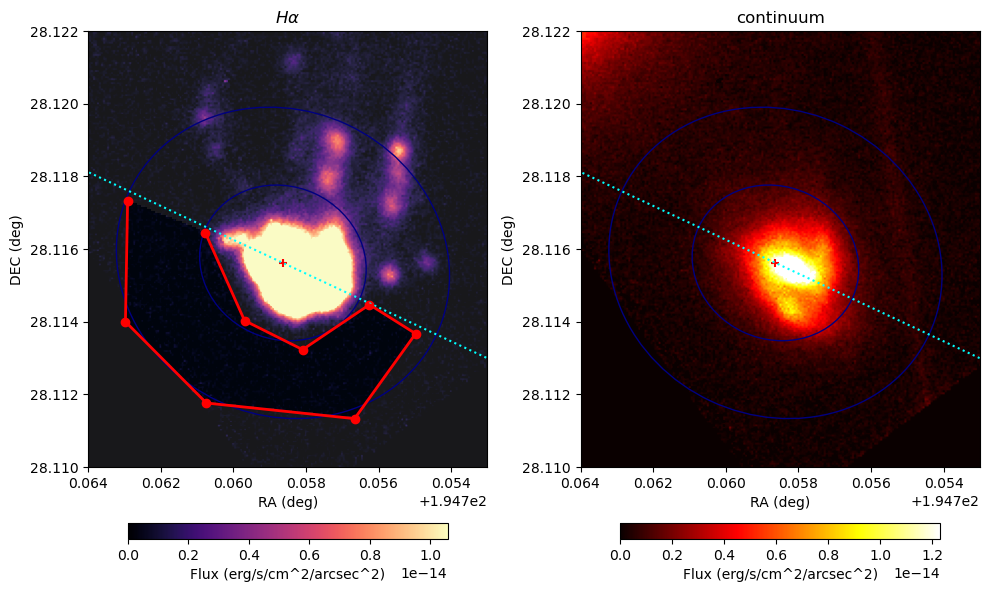

In [7]:
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.patches import Ellipse
import matplotlib.path as mpath

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the size for better appearance
ax = ax.flatten()

# Plotting the integrated Ha

#ax[k].set_xlim(194.7+0.063,194.7+0.053)
#ax[k].set_ylim(28.112,28.122)

# Define color normalization for logarithmic scaling or for linear scaling
#norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.99))
norm = Normalize(vmin=0, vmax=np.nanquantile(integrated_Ha, 0.99))

cmap = plt.cm.magma
cmap.set_bad(color='white')
im0 = ax[0].imshow(integrated_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap=cmap, norm=norm)
ax[0].set_title("$H\\alpha$")
ax[0].set_xlabel("RA (deg)")  # Label for X-axis
ax[0].set_ylabel("DEC (deg)")  # Label for Y-axis

# Plotting the integrated continuum near Ha

#norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.999))
norm = Normalize(vmin=0, vmax=np.nanquantile(integrated_continuum_near_Ha, 0.99))

im1 = ax[1].imshow(integrated_continuum_near_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='hot', norm=norm)
ax[1].set_title("continuum")
ax[1].set_xlabel("RA (deg)")  # Label for X-axis
ax[1].set_ylabel("DEC (deg)")  # Label for Y-axis

cbar0 = fig.colorbar(im0, ax=ax[0], location='bottom', shrink=0.8, pad = 0.06)
cbar1 = fig.colorbar(im1, ax=ax[1], location='bottom', shrink=0.8, pad = 0.06)

cbar0.set_label("Flux (erg/s/cm^2/arcsec^2)")  
cbar1.set_label("Flux (erg/s/cm^2/arcsec^2)")  

#####

center = (194.758633, 28.115619)  # Center of the galaxy (reference coordinates)
ax[0].scatter(center[0], center[1], marker='+', c='red')
ax[1].scatter(center[0], center[1], marker='+', c='red')

# Add ellipses
angle = + 25  # Angle of tilt in degrees

x = np.linspace(ra_min,ra_max)
m_semimajor_axis = np.tan(np.radians(angle))
y =  m_semimajor_axis * (x - center[0]) + center[1]
ax[0].plot(x,y,linestyle=':',c='cyan')
ax[1].plot(x,y,linestyle=':',c='cyan')

e = np.sqrt(1-0.9**2)
width = 42 * cdelt1
n = 3

# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)
        #x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        #y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        #ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='navy')


### Create a grid of points in RA/DEC space (using the extent)
# Create a grid of points in RA/DEC space using extent
ra_grid, dec_grid = np.meshgrid(np.linspace(ra_min, ra_max, naxis1), np.linspace(dec_min, dec_max, naxis2))

reg_1_vertices = np.array([(194.76291,28.11733), (194.76297,28.11400), (194.76074,28.11176), (194.75666,28.11133), (194.75498,28.11367), (194.75625,28.11447),
(194.75809,28.11323), (194.75969,28.11403), (194.76077,28.11645)])


# List of regions (can add more regions if needed)
reg_vertices = [reg_1_vertices]
reg_masks = []

for reg in reg_vertices: 
    # Create the polygon path in RA/DEC space
    polygon_path = mpath.Path(reg)

    # Create a mask by checking which grid points in RA/DEC are inside the polygon
    mask = polygon_path.contains_points(np.column_stack((ra_grid.flatten(), dec_grid.flatten()))).reshape((naxis2, naxis1))
    reg_masks.append(mask)
    
    # Plot the polygon and mask
    ax[0].plot(reg[:, 0], reg[:, 1], 'r-', lw=2)  # Plot the polygon
    ax[0].scatter(reg[:, 0], reg[:, 1], color='red')  # Polygon vertices
    ax[0].imshow(mask, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='Blues', interpolation='none', alpha=0.1)


for k in range(2):
    #ax[k].set_xlim(ra_min,ra_max)
    #ax[k].set_ylim(dec_min,dec_max)
    ax[k].set_xlim(194.7+0.064,194.7+0.053)
    ax[k].set_ylim(28.110,28.122)
    #ax[k].grid()


# Adjusting layout to make it fit better
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the tight_layout to leave space for colorbars
plt.show()



Text(0.5, 1.0, 'Spectrum for region 2')

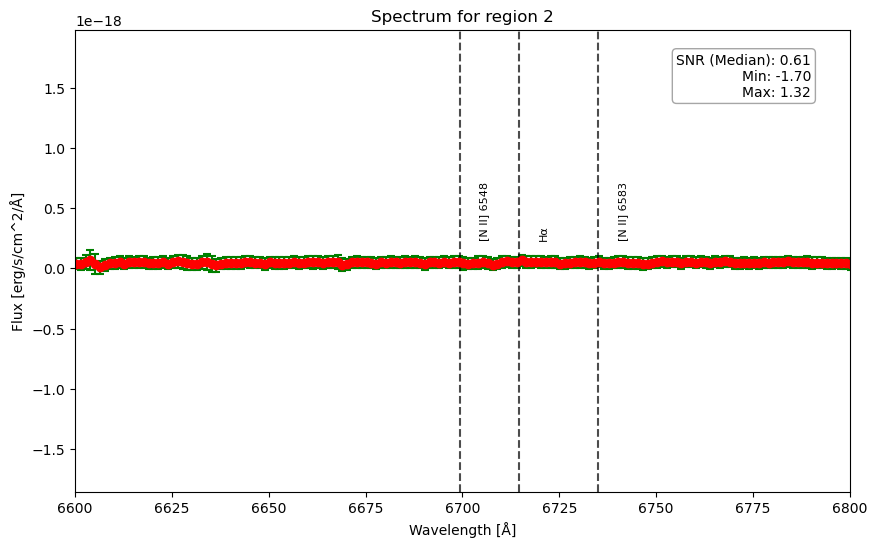

In [9]:
fig,ax= plt.subplots(figsize=(10,6))

n = len(mask[mask==True])
# Sum the spectra for the region defined by the mask (sum over the spatial axes)
spectra_region = np.nansum(cube[:, mask], axis=1) / n
var_region = np.nansum(var[:, mask], axis=1) / n
ax.errorbar(w, spectra_region * cube_units, yerr=np.sqrt(var_region * var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5)

snr = spectra_region / np.sqrt(var_region)
#ax[i].plot(w,snr)
snr_median = np.nanmedian(snr)
snr_min = np.nanmin(snr)
snr_max = np.nanmax(snr)
    
# Add text to the upper right of the plot
ax.text(0.95, 0.95, f"SNR (Median): {snr_median:.2f}\nMin: {snr_min:.2f}\nMax: {snr_max:.2f}",ha='right', va='top', transform=ax.transAxes, 
        fontsize=10, bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white', alpha=0.7)
    )

# Add vertical dashed lines for spectral features
max = np.max(spectra_region*cube_units)
for name, wavelength in redshifted_lines.items():
    ax.axvline(wavelength, color="black", linestyle="dashed", alpha=0.7)
    ax.text(wavelength + 5, max * 1.3, name, 
                 rotation=90, verticalalignment="bottom", fontsize=8, zorder=1, clip_on=True)
    
ax.set_xlim(6600,6800)
#ax.set_xlim(4950,5000)
ax.set_xlabel("Wavelength [Å]")
ax.set_ylabel("Flux [erg/s/cm^2/Å]")
ax.set_title(f"Spectrum for region {i:.0f}")

In [44]:
from astropy.io import fits

# Open the FITS file
with fits.open("DATA/ALMA/NGC4858_12m+7m_co21_crop_mom0.fits") as hdul:
    hdul.info()
    # Access the primary HDU
    data = hdul[0].data
    
    # Access the DATA HDU
    #data_hdu = hdul[1]
    #data = data_hdu.data  # 3D data cube
    #data_header = data_hdu.header  # Metadata for the DATA HDU

Filename: DATA/ALMA/NGC4858_12m+7m_co21_crop_mom0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     137   (308, 486)   float32   


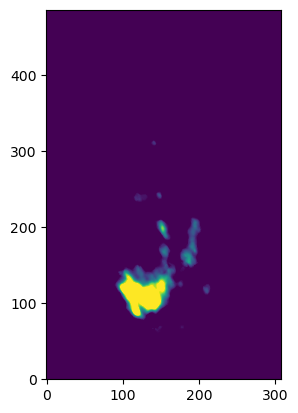

In [46]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(data,origin='lower',clim=np.quantile(data,[0.01,0.99]))